In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings

pd.set_option('display.float_format', lambda num:'%1.3f'%num)
pd.set_option('display.max_columns', 99)
filterwarnings('ignore')

In [35]:
train = pd.read_csv("train.csv")

In [36]:
train.head()

,app_id,category,reviews,size,installs,price,suitable_for,last_update,latest_ver,popularity
0,330090,PERSONALIZATION,4,511k,50+,0,Everyone,"December 31, 2016",1.4,High
1,226147,GAME,568391,5.2M,"5,000,000+",0,Teen,"July 1, 2014",4.3.1,High
2,107000,FAMILY,144,70M,"1,000+",$2.99,Teen,"January 26, 2018",1.0.0,High
3,217582,FAMILY,1499466,96M,"10,000,000+",0,Teen,"July 24, 2018",1.25.0,High
4,370113,DATING,84,4.5M,"1,000+",0,Mature 17+,"July 6, 2018",8.2,High


In [37]:
#checking for duplicates
train.duplicated().sum()

0

In [38]:
#Explore columns
train.columns

Index(['app_id', 'category', 'reviews', 'size', 'installs', 'price',
       'suitable_for', 'last_update', 'latest_ver', 'popularity'],
      dtype='object')

In [39]:
#taking a look at data types & null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   app_id        1975 non-null   int64 
 1   category      1975 non-null   object
 2   reviews       1975 non-null   int64 
 3   size          1975 non-null   object
 4   installs      1975 non-null   object
 5   price         1975 non-null   object
 6   suitable_for  1975 non-null   object
 7   last_update   1975 non-null   object
 8   latest_ver    1971 non-null   object
 9   popularity    1975 non-null   object
dtypes: int64(2), object(8)
memory usage: 154.4+ KB


In [40]:
#dropping rows with null values
train = train.dropna()
train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1974
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   app_id        1971 non-null   int64 
 1   category      1971 non-null   object
 2   reviews       1971 non-null   int64 
 3   size          1971 non-null   object
 4   installs      1971 non-null   object
 5   price         1971 non-null   object
 6   suitable_for  1971 non-null   object
 7   last_update   1971 non-null   object
 8   latest_ver    1971 non-null   object
 9   popularity    1971 non-null   object
dtypes: int64(2), object(8)
memory usage: 169.4+ KB


In [41]:
#DATA CLEANING & PREPROCESSING

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
import seaborn as sns
import time
from scipy.stats import pearsonr
import datetime

def format_num(num): #function to format number in size column
    count = 0
    if "M" in num:
        if "." in num:
            idx = num.index(".") 
            num = num.replace(".","")
        else: idx = len(num)-1
        num = num.replace("M","")
        for i in range((idx+6)-len(num)): 
            num += "0"
    elif "k" in num:
        if "." in num:
            idx = num.index(".") 
            num = num.replace(".","")
        else: idx = len(num)-1
        num = num.replace("k","")
        for i in range((idx+3)-len(num)): 
            num += "0"
    return num

def remove_dot(num): #function to remove period from lastest_ver column
    occurrence = num.count(".")
    if occurrence > 1:
        for i in range(occurrence-1):
            idx = num.rindex(".")
            num = num[:idx] + num[idx+1:]
        return num
    else:
        return num
    
train["size"] = train["size"].astype(str).apply(format_num, 1).astype(float) #converting short hand notation of num to full number for "size" column
train["installs"] = train["installs"].apply(lambda x: x.strip("+").replace(",","")).astype(float) #removing the plus signs & commas from values in "installs" column
train["price"] = train["price"].astype(str).apply(lambda x: x.strip("$")).astype(float) #removing dollar sign symbol from number
train["latest_ver"] = train["latest_ver"].astype(str).apply(remove_dot, 1).astype(float) #removing periods to turn into proper decimal
train["last_update"] = train["last_update"].apply(lambda x: time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple())) #converting date to timestamp
le = LabelEncoder()
train["popularity"] = le.fit_transform(train["popularity"])

In [44]:
#checking datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1974
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   app_id        1971 non-null   int64  
 1   category      1971 non-null   object 
 2   reviews       1971 non-null   int64  
 3   size          1971 non-null   float64
 4   installs      1971 non-null   float64
 5   price         1971 non-null   float64
 6   suitable_for  1971 non-null   object 
 7   last_update   1971 non-null   float64
 8   latest_ver    1971 non-null   float64
 9   popularity    1971 non-null   int32  
dtypes: float64(5), int32(1), int64(2), object(2)
memory usage: 161.7+ KB


In [45]:
#displaying central tendencies of data
train.describe()

#NEED TO NORMALIZE NUMERICAL DATA HERE AND VISUALIZE

,app_id,reviews,size,installs,price,last_update,latest_ver,popularity
count,1971.000,1971.000,1971.000,1971.000,1971.000,1971.000,1971.000,1971.000
mean,490846.935,199212.289,20425462.202,3825912.383,0.860,1510999479.452,21644.937,0.265
std,288217.174,1495580.794,21971652.409,26226175.364,12.703,33460740.233,643185.018,0.442
min,1160.000,1.000,29000.000,1.000,0.000,1308801600.000,0.010,0.000
25%,239249.500,33.000,4800000.000,1000.000,0.000,1505361600.000,1.110,0.000
50%,482873.000,516.000,12000000.000,50000.000,0.000,1526529600.000,1.819,0.000
75%,738173.000,19189.500,27000000.000,1000000.000,0.000,1531800000.000,3.300,1.000
max,999218.000,44891723.000,100000000.000,1000000000.000,399.990,1533614400.000,20180620.000,1.000


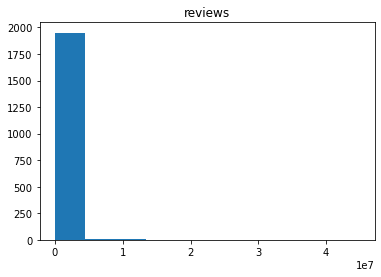

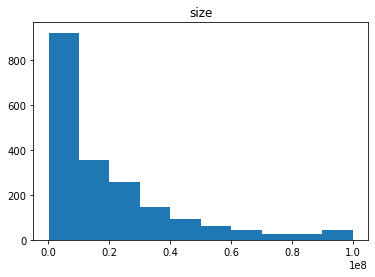

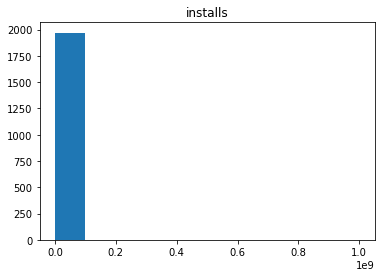

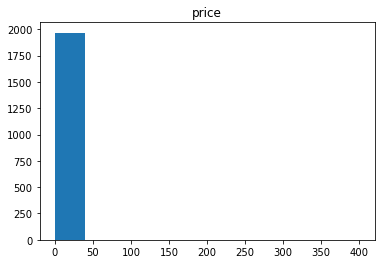

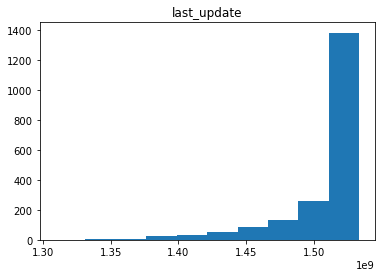

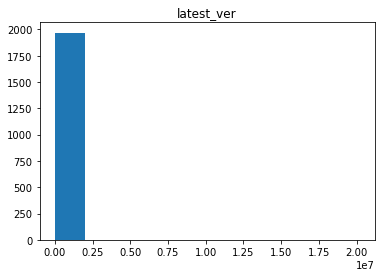

In [46]:
#splitting up data into categorical and continuous for analysis
num_df = train[["reviews", "size", "installs", "price", "last_update", "latest_ver"]]
cat_df = train[["category", "suitable_for"]]

#taking a look at the distributions
for i in num_df.columns:
    plt.hist(num_df[i])
    plt.title(i)
    plt.show()

,reviews,size,installs,price,last_update,latest_ver
reviews,1.000,0.207,0.676,-0.009,0.067,-0.004
size,0.207,1.000,0.179,-0.016,0.237,-0.016
installs,0.676,0.179,1.000,-0.010,0.071,-0.005
price,-0.009,-0.016,-0.010,1.000,-0.020,-0.002
last_update,0.067,0.237,0.071,-0.020,1.000,0.017
latest_ver,-0.004,-0.016,-0.005,-0.002,0.017,1.000


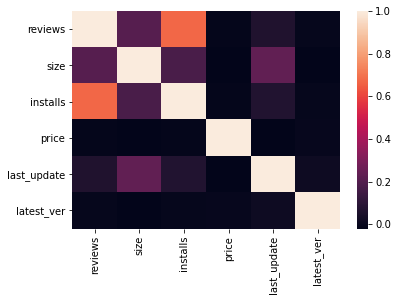

In [47]:
import seaborn as sns
sns.heatmap(num_df.corr())
num_df.corr()

In [48]:
#PRE-PROCESSING CATEGORICAL DATA

#applies different preprocessing to different columns
#specifically selects from df columns by name
#passthrough or drop unspecified columns
#used anytime features in the df need DIFFERENT preprocessing than other columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#scaled = scaler.fit_transform(num_df[["reviews", "size", "installs", "price", "last_update", "latest_ver"]])
X = train.drop(["popularity", "app_id"], axis="columns")
y = train[["popularity"]]

#creating preprocessor for cat and num features
preprocessor = make_column_transformer(
    (MinMaxScaler(), ["reviews", "size", "installs", "price", "last_update", "latest_ver"]),
    (OneHotEncoder(handle_unknown="ignore"), ["category", "suitable_for"]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) #splitting data into train/test sets


In [49]:
train.head()

,app_id,category,reviews,size,installs,price,suitable_for,last_update,latest_ver,popularity
0,330090,PERSONALIZATION,4,511000.000,50.000,0.000,Everyone,1483160400.000,1.400,0
1,226147,GAME,568391,5200000.000,5000000.000,0.000,Teen,1404187200.000,4.310,0
2,107000,FAMILY,144,70000000.000,1000.000,2.990,Teen,1516942800.000,1.000,0
3,217582,FAMILY,1499466,96000000.000,10000000.000,0.000,Teen,1532404800.000,1.250,0
4,370113,DATING,84,4500000.000,1000.000,0.000,Mature 17+,1530849600.000,8.200,0


In [50]:
train.pivot_table(index="popularity", values="price", aggfunc = "mean")
#train.head()

,price
popularity,
0,0.479
1,1.916


In [53]:
train.pivot_table(index="popularity", columns="category", values="installs", aggfunc="mean")
#train["category"].value_counts()

category,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
popularity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1613882.353,543961.538,249545.455,851294.186,568983.372,348285.714,4430088.571,915488.235,2209136.364,4700000.000,151016.667,1572001.039,858917.273,1105565.789,22399198.596,1979567.833,4040200.000,83454.545,1417485.574,1180853.846,196589.494,737211.429,1151500.000,5307334.714,7726089.459,5845768.636,7726915.185,1203945.270,2481060.698,6790696.698,1537442.857,20186535.714,836000.000
1,nan,18016.667,10000.000,152857.143,265477.273,1025000.000,22014.286,427674.211,100000.000,nan,nan,482407.030,85392.593,1732857.143,1504100.000,479221.739,367000.000,300000.000,292823.333,23923.846,59523.214,340684.211,10000.000,522270.000,355733.889,401661.111,300420.000,217442.857,1391925.417,940902.308,35272.727,644552.632,55000.000


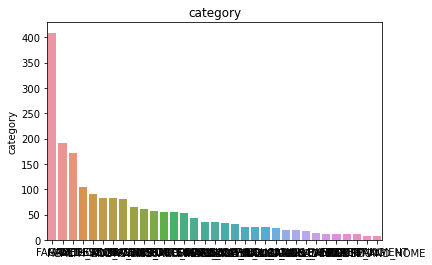

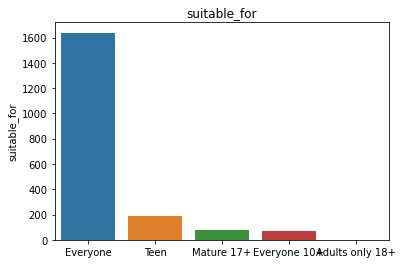

In [261]:
for i in cat_df.columns:
    sns.barplot(cat_df[i].value_counts().index, cat_df[i].value_counts()).set_title(i)
    plt.show()

In [268]:
cat_df["category"].value_counts()

FAMILY                 409
GAME                   191
TOOLS                  171
MEDICAL                105
LIFESTYLE               91
HEALTH_AND_FITNESS      83
FINANCE                 82
PERSONALIZATION         80
BUSINESS                65
PRODUCTIVITY            62
BOOKS_AND_REFERENCE     57
SPORTS                  55
PHOTOGRAPHY             55
NEWS_AND_MAGAZINES      54
SOCIAL                  44
DATING                  36
COMMUNICATION           35
VIDEO_PLAYERS           33
SHOPPING                32
MAPS_AND_NAVIGATION     26
FOOD_AND_DRINK          26
TRAVEL_AND_LOCAL        25
EDUCATION               23
COMICS                  19
AUTO_AND_VEHICLES       19
ART_AND_DESIGN          17
LIBRARIES_AND_DEMO      13
EVENTS                  12
WEATHER                 12
BEAUTY                  12
PARENTING               11
ENTERTAINMENT            8
HOUSE_AND_HOME           8
Name: category, dtype: int64

Best estimator N: 2
Best score: 0.7465437788018433


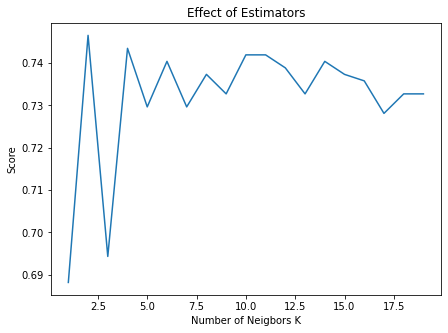

In [62]:
from sklearn.pipeline import make_pipeline
from numpy import mean, std
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

scores = []
range_ = np.arange(1, 20, 1)
best_n = 0
best_score = 0
for i in range_:
    knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean") #creating KNN model object
    pipe = make_pipeline(preprocessor, knn)
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    score = metrics.accuracy_score(y_test, pred)
    if best_score < score and score < 1: #saving best score
        best_score = score
        best_n = i #saving best n estimator
    scores.append(score)
    
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neigbors K")
plt.ylabel("Score")
plt.plot(range_, scores)

print("Best estimator N: {}".format(best_n))
print("Best score: {}".format(best_score))

In [79]:
#USING CROSS VAL SCORE ON KNN MODEL W/ BEST NEIGHBOR
knn = KNeighborsClassifier(n_neighbors=best_n, metric="euclidean") #creating KNN model object
pipe = make_pipeline(preprocessor, knn)
scores = cross_val_score(pipe, X, y, cv=5, scoring="accuracy")
scores.mean()

0.7371894878879394

In [366]:
#Trying logistic regression to see if accuracy improves
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
pipe = make_pipeline(column_trans, logreg)
pipe.fit(X_train, y_train)
predicted = pipe.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, predicted))

Accuracy:  0.7327188940092166


In [146]:
from sklearn import svm
clf = svm.SVC()
pipe = make_pipeline(preprocessor, clf)
pipe.fit(X_train, y_train)
predicted = pipe.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predicted))

Accuracy:  0.7357910906298003


Top Estimator:  190
Top Score:  0.7895545314900153


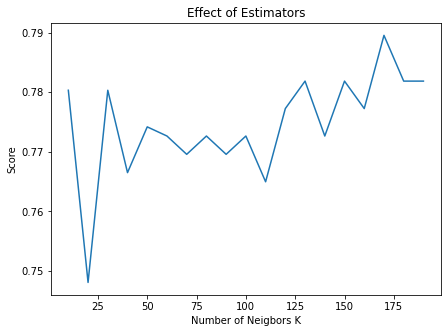

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

estimators = np.arange(10, 200, 10)
scores = []
top_estimator = 0
top_score = 0
for n in estimators:
    forest = RandomForestClassifier(n_estimators=n)
    pipe = make_pipeline(preprocessor, forest)
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    top_score = score if top_score < score else top_score
    top_estimator = n if top_score > score else top_estimator
    scores.append(score)
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neigbors K")
plt.ylabel("Score")
plt.plot(estimators, scores)
results = list(zip(estimators, scores))
print("Top Estimator: ", top_estimator)
print("Top Score: ", top_score)

In [82]:
forest = RandomForestClassifier(n_estimators=top_estimator)
pipe = make_pipeline(preprocessor, forest)
scores = cross_val_score(pipe, X, y, cv=5, scoring="accuracy")
print(scores.mean())

0.766117072543854
